# 기본 예시 및 설명
---

## STEP 1 : 시계열 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = 'data/005930.KS.csv'
#날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있다.
data = pd.read_csv(dataset_filepath, index_col='Date',parse_dates=True)
ts = data['Close'] # 여기에서는 종가만 사용하겠다.
print(type(ts))
ts

<class 'pandas.core.series.Series'>


Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
               ...   
2021-05-12    80000.0
2021-05-13    78500.0
2021-05-14    80100.0
2021-05-17    79600.0
2021-05-18    79600.0
Name: Close, Length: 250, dtype: float64

In [2]:
# time series로 입력으로 받아 정성적 그래프 분석
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


In [3]:
# 정량적 그래프 분석
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


## STEP 2 : 각종 전처리 수행

결측치를 처리해주는 방법으로는
- 결측치가 있는 데이터를 모두 삭제
- 결측치 양옆의 값들을 이용해서 적절히 보간하여 대입   

방법이 있다. 여기서는 보간을 사용하였다.

Series([], Name: Close, dtype: float64)


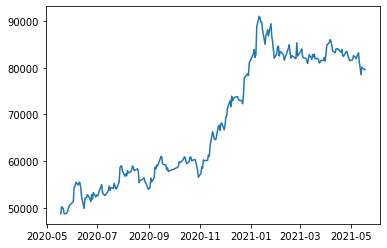

In [4]:
# 결측치가 있다면 이를 보간한다. 
# 보간 기준은 time을 선택한다.
ts.interpolate(method='time')

# 보간 이후 결측치(Nan) 유무를 다시 확인한다.
print(ts[ts.isna()]) # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
plt.plot(ts)

> 

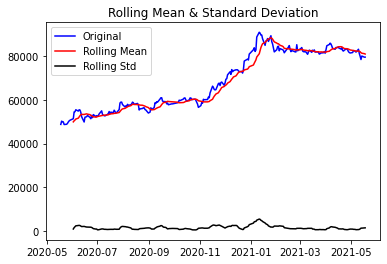

In [6]:
plot_rolling_statistics(ts, window=12)

In [7]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


해당 데이터의 시계열이 안정적이지 않다는 귀무가설은 p-value를 봤을 때 값이 작지 않으므로 이 귀무가설을 기각할 수는 없게 되었으므로 이 시계열이 안정적인 시계열이라고 말할 수 없다.

### 로그 함수 변환
시간 추이에 따라 분산이 점점 커지고 있다면 **로그함수**로 변환해주는 것이 도움이 된다.

In [8]:
# 로그 변환
ts_log = np.log(ts)
ts_log

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
                ...    
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, Length: 250, dtype: float64

In [9]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


p-value가 0.663778 에서 0.590149로 줄어들기는 했지만 아직 만족 스럽지 못하다.   
가장 두드러진 문제점은 시간 추이에 따라 평균이 계속 증가하는 것을 막아줘야 한다.

### Moving average 제거 - 추세(Trend) 상쇄하기

* 추세(Trent) : 시간 추이에 따라 나타나는 평균값 변화

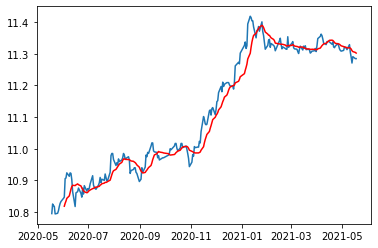

In [59]:
moving_avg = ts_log.rolling(window=12).mean() # moving average 구하기
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [60]:
ts_log_moving_avg = ts_log - moving_avg # 변화량제거
ts_log_moving_avg.head(15)

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22         NaN
2020-05-25         NaN
2020-05-26         NaN
2020-05-27         NaN
2020-05-28         NaN
2020-05-29         NaN
2020-06-01         NaN
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
Name: Close, dtype: float64

window size = 12로 했기 때문에 앞에 11개는 Moving Average가 계산 되지 않으므로 결측치가 된다.
결측치를 없애보자.

In [31]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
2020-06-08    0.061862
2020-06-09    0.061925
2020-06-10    0.049636
2020-06-11    0.021446
2020-06-12   -0.019996
2020-06-15   -0.066141
2020-06-16   -0.025267
2020-06-17   -0.024961
2020-06-18   -0.024494
2020-06-19   -0.010603
2020-06-22   -0.023697
Name: Close, dtype: float64

p-value가 0.000759 수준이 되었다. 95% 이상의 confidenc로 이 time series는 Stationary하다고 할 수 있다.

### 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소이다.    
이런 계절적, 주기적 패턴을 계절성이라고 한다. 이런 계절성을 없애보자.

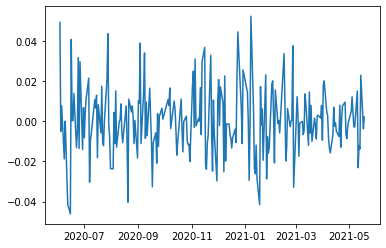

In [65]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

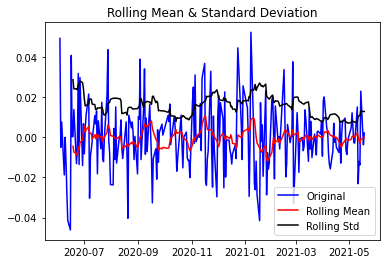

In [66]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [ ]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.546028e+01
p-value                        2.711476e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


## STEP 3 : 시계열 안정성 분석

statsmodels 라이브러라 안에는 seansonal_decompose 함수를 통해 시계열 안에 존재하는 trend와 seasonality를 직접 분리해 낼 수 있는 기능이 있다. 이걸 활용해보자. 

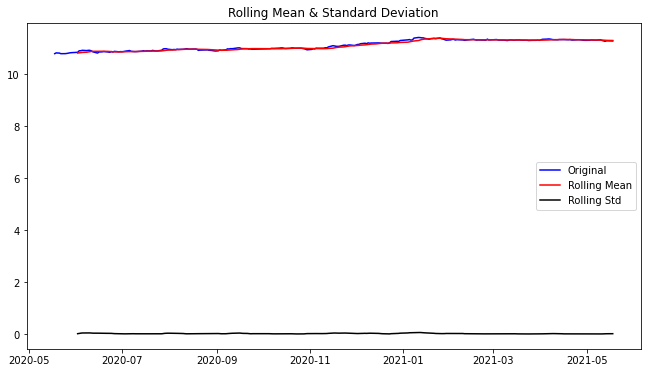

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


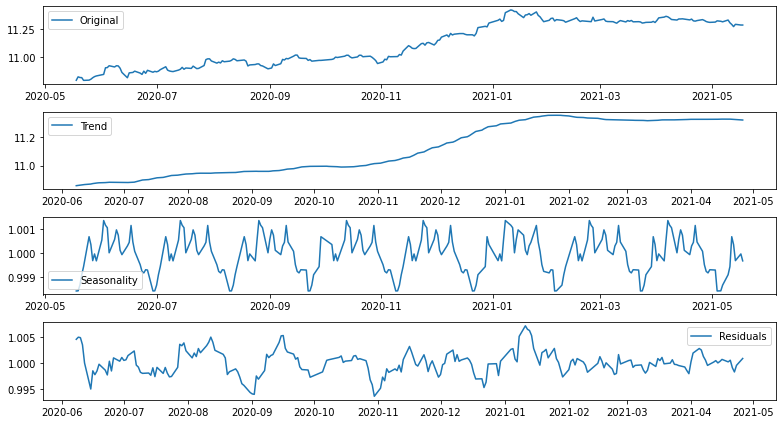

In [13]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


p-value 가 0.00000006234854 수준이므로 Stationary 하다고 할 수 있다.

## STEP 4 : 학습, 테스트 데이터셋 생성

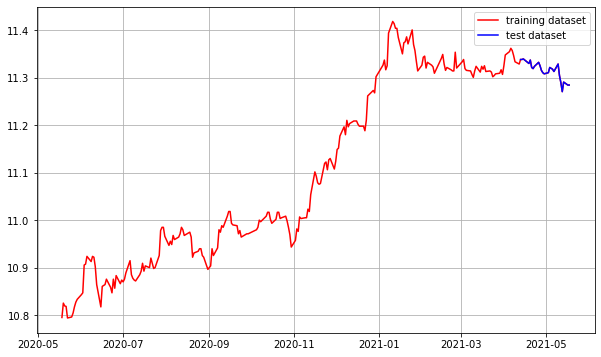

In [14]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

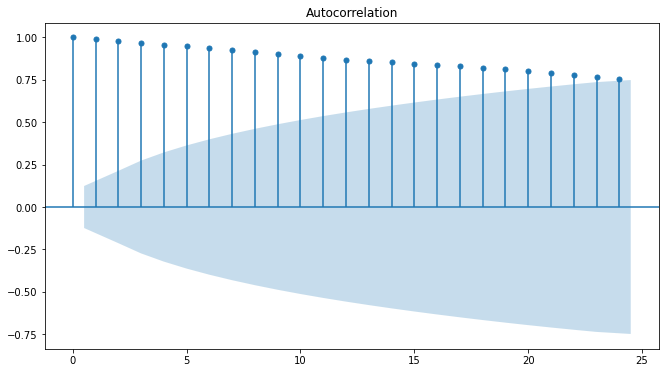

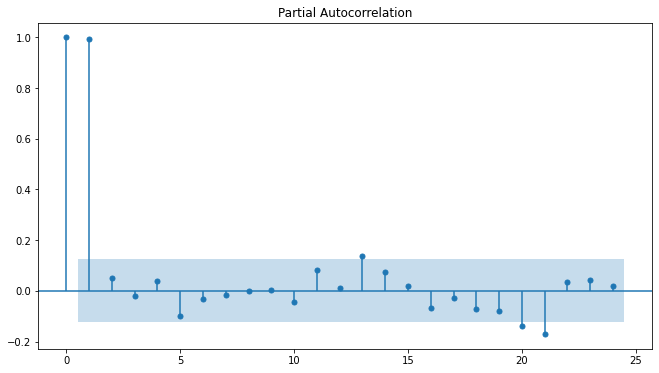

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 그려보기 -> p,q 구하기
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프를 볼 때 p가 2 이상인 구간에서는 PCAF 그래프는 0에 가까워 지고 있기 때문에 p=1이 매우 적합하다.    
ACF는 점차적으로 감소하고 있어, q에 대한 적합한 값이 없어보이므로 q=0으로 둔다.

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


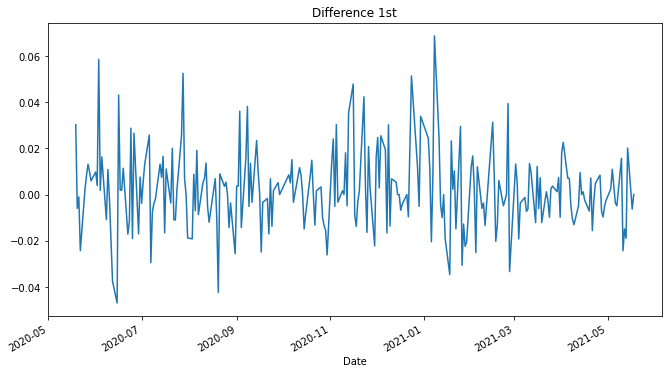

In [17]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


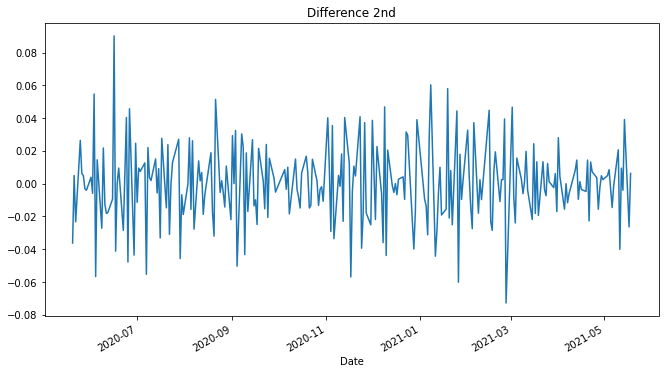

In [18]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

p-value를 확인하였을 때 1차 미분 하였을 때가 더 낮은 값이 출력되었으므로, 1차 미분하였을 때가 더 안정화된 상태란걸 확인할 수 있기 때문에 d=1로 정해준다.

최종 선택한 모수는 p=1 q=0 d=1 이다.

## STEP 6 : ARIMA 모델 훈련과 테스트

### ARIMA 모델 빌드와 훈련

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # order=(p,d,q)
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 585.396
Method:                       css-mle   S.D. of innovations              0.018
Date:                Mon, 06 Sep 2021   AIC                          -1164.792
Time:                        22:56:04   BIC                          -1154.557
Sample:                             1   HQIC                         -1160.661
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      1.978      0.048    2.17e-05       0.005
ar.L1.D.Close     0.0168      0.067      0.250      0.803      -0.115       0.148
                                    Root

C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no 

### 모델 테스트 및 플로팅

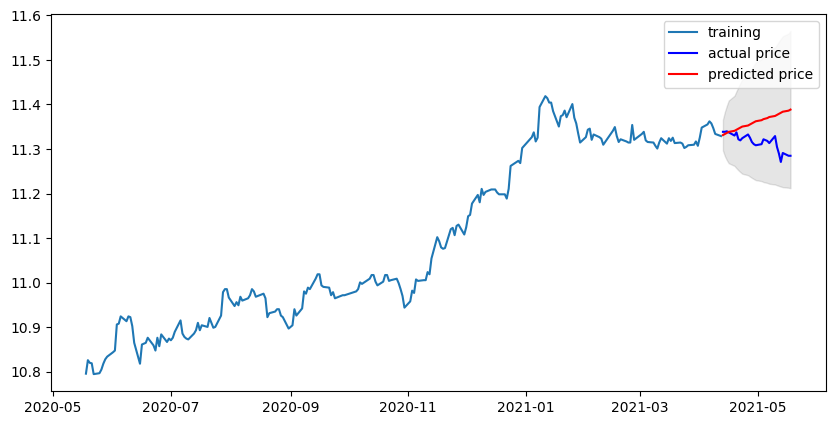

In [23]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### 최종 예측 모델 정확도 측정(MAPE)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22087366.126154922
MAE:  3791.3511527213127
RMSE:  4699.719792301976
MAPE: 4.68%


# 2. Naver 주가 예측
---

## STEP 1 : 시계열 데이터 준비

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = 'data/035420.KS_naver.csv'
#날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있다.
data = pd.read_csv(dataset_filepath, index_col='Date',parse_dates=True)
ts = data['Close'] # 여기에서는 종가만 사용하겠다.
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-09-07    314500.0
2020-09-08    311000.0
2020-09-09    304500.0
2020-09-10    307500.0
2020-09-11    306000.0
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [33]:
# 결측치가 있다면 이를 보간한다. 
# 보간 기준은 time을 선택한다.
ts.interpolate(method='time')

# 보간 이후 결측치(Nan) 유무를 다시 확인한다.
ts[ts.isna()] # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [34]:
# 로그 변환
ts_log = np.log(ts)
ts_log

Date
2020-09-07    12.658739
2020-09-08    12.647548
2020-09-09    12.626426
2020-09-10    12.636230
2020-09-11    12.631340
                ...    
2021-08-30    12.966878
2021-08-31    12.992255
2021-09-01    13.005830
2021-09-02    13.000196
2021-09-03    13.022543
Name: Close, Length: 247, dtype: float64

## STEP 3 : 시계열 안정성 분석

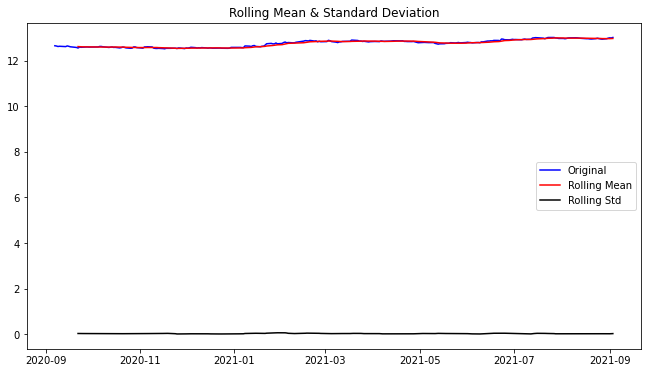

Results of Dickey-Fuller Test:
Test Statistic                  -0.357588
p-value                          0.916943
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


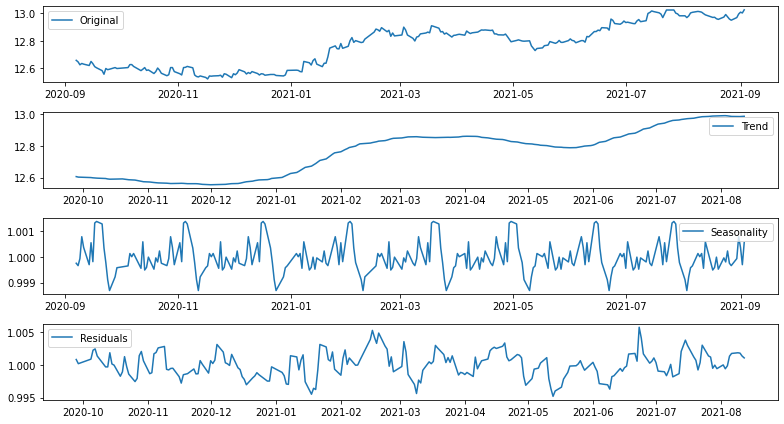

In [35]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [36]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.578795e+00
p-value                        7.605933e-09
#Lags Used                     1.000000e+00
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


p-value 가 0.000000007605933 수준이므로 Statinary하다고 할 수 있다.

## STEP 4 : 학습, 테스트 데이터셋 생성

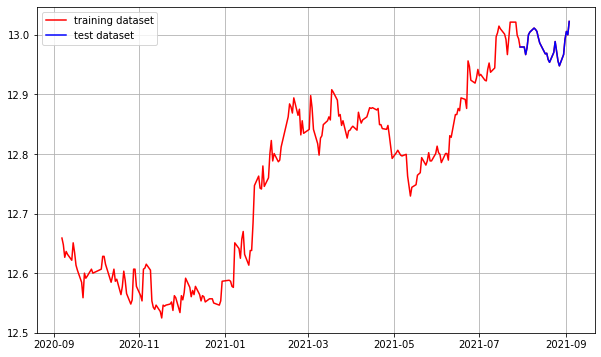

In [37]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


## STEP 5 : 적정 ARIMA 모수 찾기

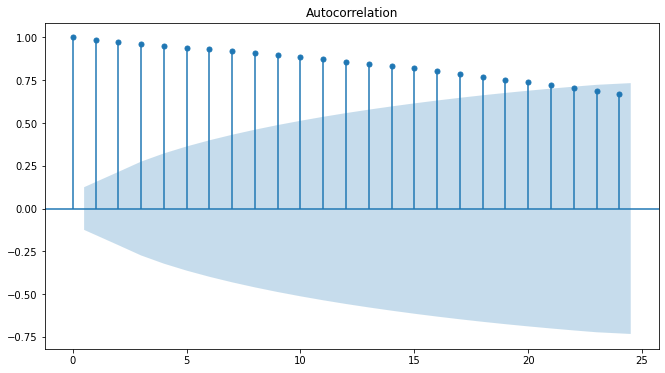

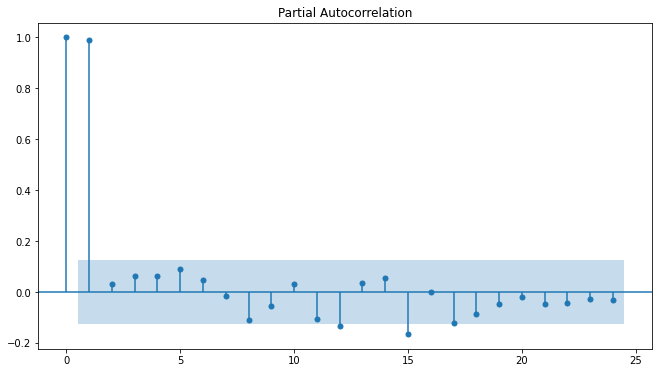

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 그려보기 -> p,q 구하기
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프를 볼 때 p가 2 이상인 구간에서는 PCAF 그래프는 0에 가까워 지고 있기 때문에 p=1이 매우 적합하다.    
ACF는 점차적으로 감소하고 있어, q에 대한 적합한 값이 없어보이므로 q=0으로 둔다.

Results of Dickey-Fuller Test:
Test Statistic                -1.266271e+01
p-value                        1.294516e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


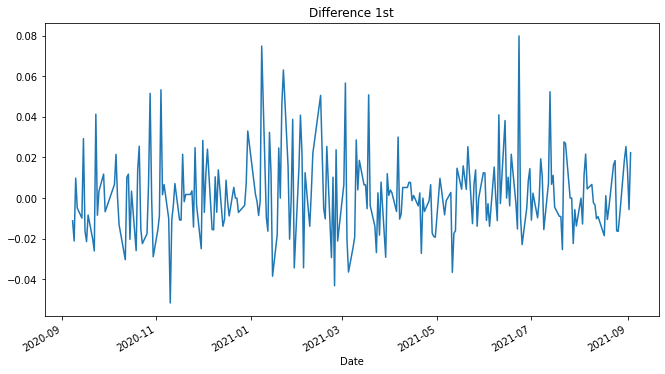

In [39]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -6.930112e+00
p-value                        1.089601e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


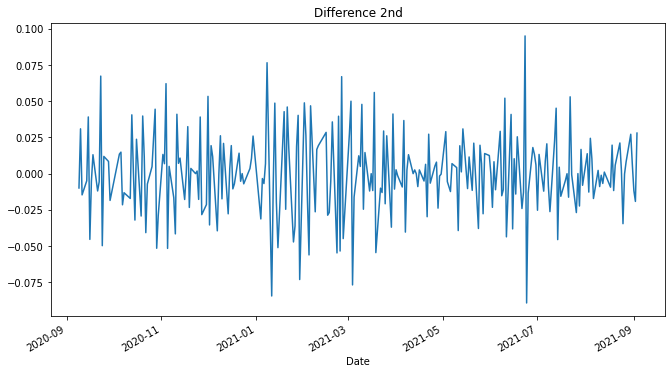

In [40]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

p-value를 확인하였을 때 1차 미분 하였을 때가 더 낮은 값이 출력되었으므로, 1차 미분하였을 때가 더 안정화된 상태란걸 확인할 수 있기 때문에 d=1로 정해준다.

최종 선택한 모수는 p=1 q=0 d=1 이다.

## STEP 6 : ARIMA 모델 훈련과 테스트

In [41]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # order = (p,d,q)
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 542.966
Method:                       css-mle   S.D. of innovations              0.021
Date:                Mon, 06 Sep 2021   AIC                          -1079.932
Time:                        23:10:34   BIC                          -1069.737
Sample:                             1   HQIC                         -1075.815
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.001      1.120      0.263      -0.001       0.004
ar.L1.D.Close    -0.0297      0.067     -0.442      0.658      -0.161       0.102
                                    Root

C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no 

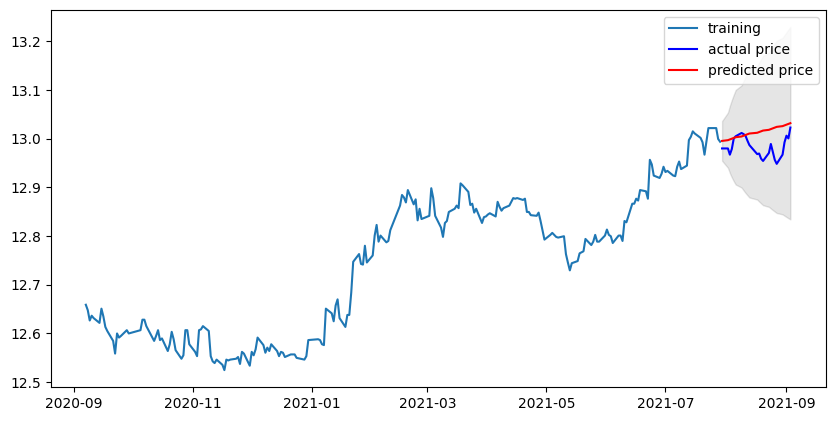

In [42]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  273121371.38867277
MAE:  13484.391961321118
RMSE:  16526.384099030034
MAPE: 3.14%


# Apple 주가 예측
---

## STEP 1 : 시계열 데이터 준비

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = 'data/AAPL_apple.csv'
#날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있다.
data = pd.read_csv(dataset_filepath, index_col='Date',parse_dates=True)
ts = data['Close'] # 여기에서는 종가만 사용하겠다.
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-09-08    112.820000
2020-09-09    117.320000
2020-09-10    113.489998
2020-09-11    112.000000
2020-09-14    115.360001
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [53]:
# 결측치가 있다면 이를 보간한다. 
# 보간 기준은 time을 선택한다.
ts.interpolate(method='time')

# 보간 이후 결측치(Nan) 유무를 다시 확인한다.
ts[ts.isna()] # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [54]:
# 로그 변환
ts_log = np.log(ts)
ts_log

Date
2020-09-08    4.725794
2020-09-09    4.764905
2020-09-10    4.731715
2020-09-11    4.718499
2020-09-14    4.748058
                ...   
2021-08-30    5.031222
2021-08-31    5.022761
2021-09-01    5.027230
2021-09-02    5.034677
2021-09-03    5.038899
Name: Close, Length: 251, dtype: float64

## STEP 3 : 시계열 안정성 분석

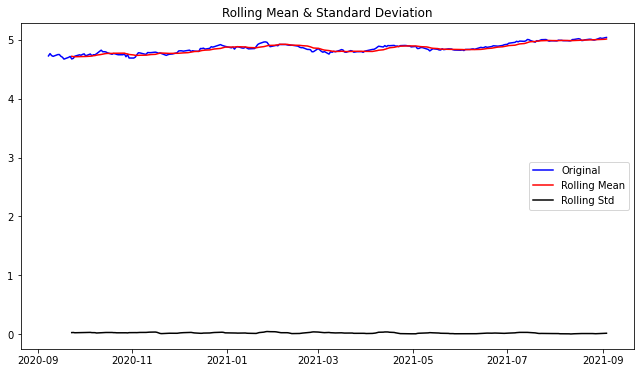

Results of Dickey-Fuller Test:
Test Statistic                  -0.964137
p-value                          0.766119
#Lags Used                       1.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


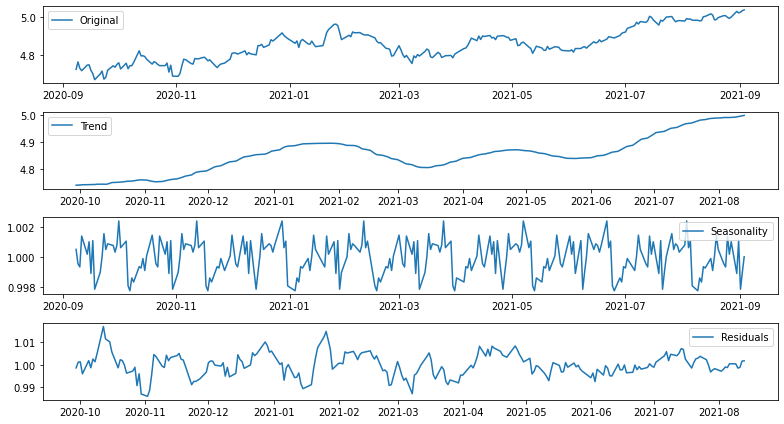

In [55]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [56]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.416770
p-value                          0.000003
#Lags Used                       0.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


p-value 가 0.000003 수준이므로 Stationary 하다고 할 수 있다.

## STEP 4 : 학습, 테스트 데이터셋 생성

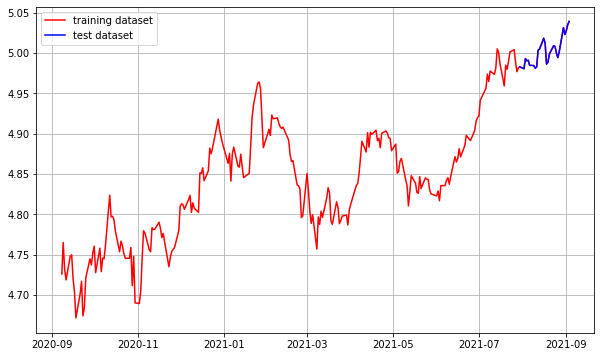

In [57]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

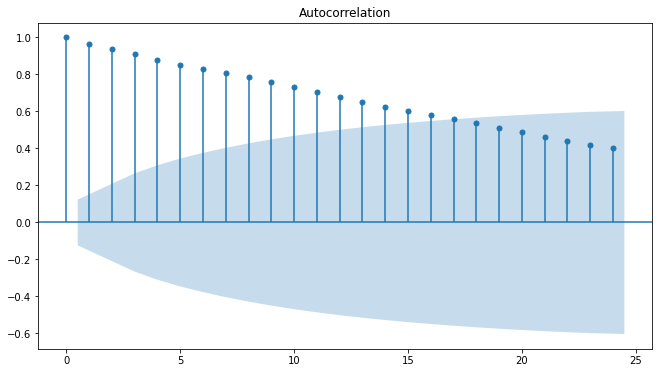

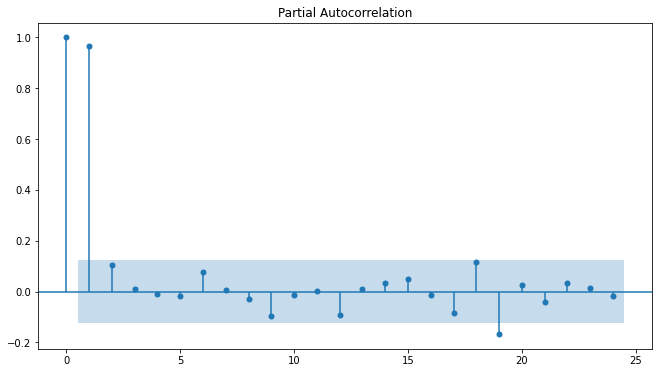

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 그려보기 -> p,q 구하기
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프를 볼 때 p가 2 이상인 구간에서는 PCAF 그래프는 0에 가까워 지고 있기 때문에 p=1이 매우 적합하다.   
ACF는 점차적으로 감소하고 있어, q에 대한 적합한 값이 없어보이므로 q=0으로 둔다.

Results of Dickey-Fuller Test:
Test Statistic                -1.773999e+01
p-value                        3.405496e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


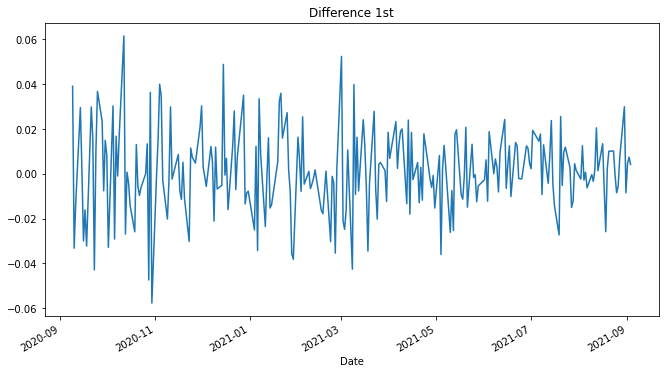

In [59]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.201193e+00
p-value                        2.363091e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


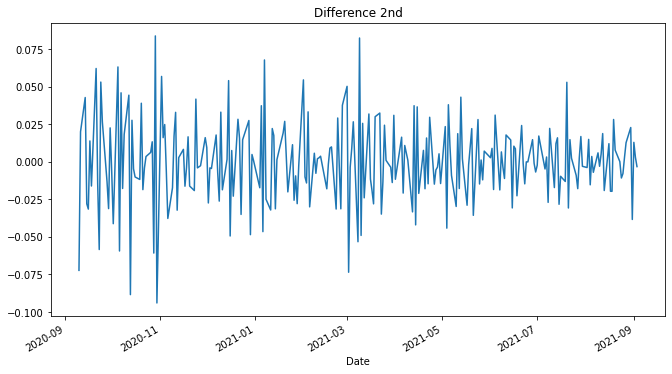

In [60]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

p-value를 확인하였을 때 1차 미분 하였을 때가 더 낮은 값이 출력되었으므로, 1차 미분하였을 때가 더 안정화된 상태란걸 확인할 수 있기 때문에 d=1로 정해준다.

최종 선택한 모수는 p=1 q=0 d=1 이다.

## STEP 6 : ARIMA 모델 훈련과 테스트

In [61]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # order=(p,d,q)
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 569.835
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 06 Sep 2021   AIC                          -1133.670
Time:                        23:13:25   BIC                          -1123.435
Sample:                             1   HQIC                         -1129.539
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      0.986      0.324      -0.001       0.003
ar.L1.D.Close    -0.1182      0.067     -1.769      0.077      -0.249       0.013
                                    Root

C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no 

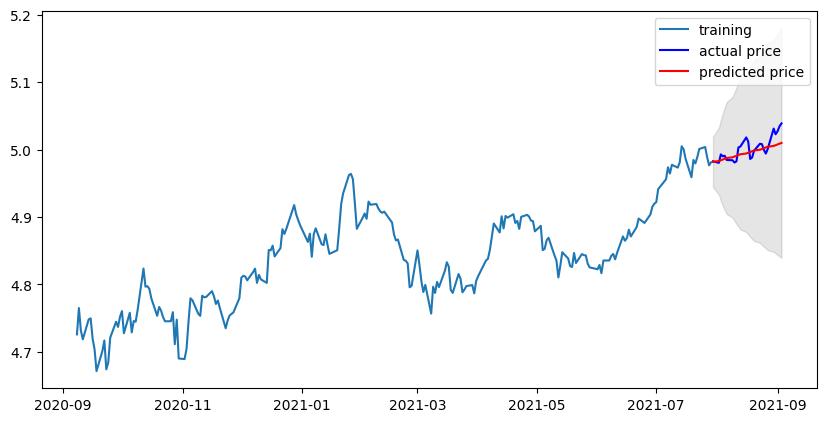

In [62]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4.034801430412081
MAE:  1.5856051803061735
RMSE:  2.0086815154254993
MAPE: 1.05%


# LG Display 주가 예측
---

## STEP 1 : 시계열 데이터 준비

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = 'data/LPL_lgd.csv'
#날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있다.
data = pd.read_csv(dataset_filepath, index_col='Date',parse_dates=True)
ts = data['Close'] # 여기에서는 종가만 사용하겠다.
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2020-09-08    6.65
2020-09-09    6.81
2020-09-10    6.83
2020-09-11    7.09
2020-09-14    7.08
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [65]:
# 결측치가 있다면 이를 보간한다. 
# 보간 기준은 time을 선택한다.
ts.interpolate(method='time')

# 보간 이후 결측치(Nan) 유무를 다시 확인한다.
ts[ts.isna()] # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [66]:
# 로그 변환
ts_log = np.log(ts)
ts_log

Date
2020-09-08    1.894617
2020-09-09    1.918392
2020-09-10    1.921325
2020-09-11    1.958685
2020-09-14    1.957274
                ...   
2021-08-30    2.175887
2021-08-31    2.175887
2021-09-01    2.190536
2021-09-02    2.178155
2021-09-03    2.195000
Name: Close, Length: 251, dtype: float64

## STEP 3 : 시계열 안정성 분석

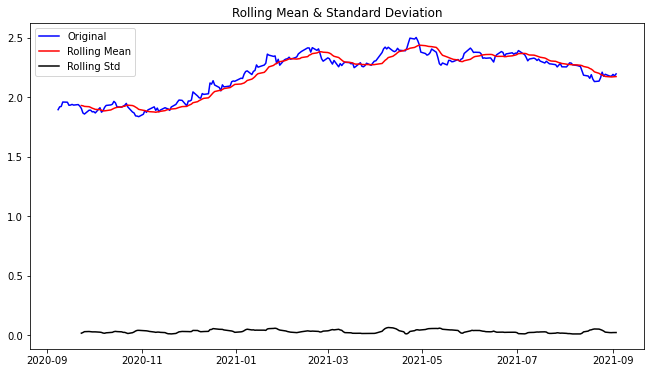

Results of Dickey-Fuller Test:
Test Statistic                  -1.676292
p-value                          0.443367
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


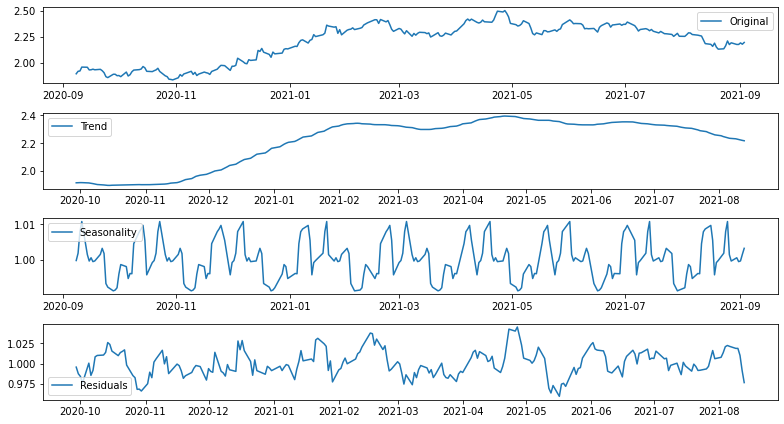

In [67]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

# 시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [68]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.267631
p-value                          0.000505
#Lags Used                      13.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


p-value 가  0.000505 수준이므로 Stationary 하다고 할 수 있다.

## STEP 4 : 학습, 테스트 데이터셋 생성

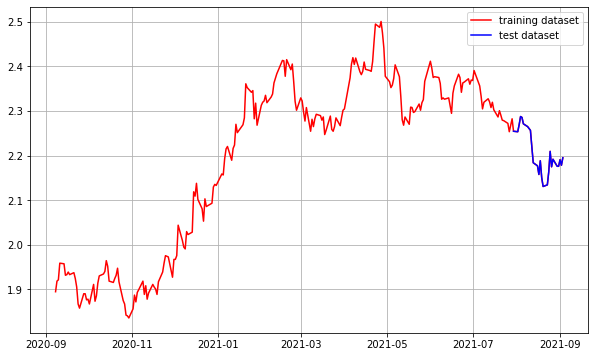

In [69]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

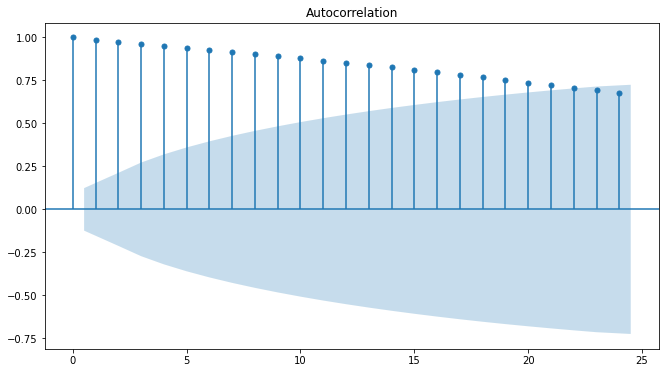

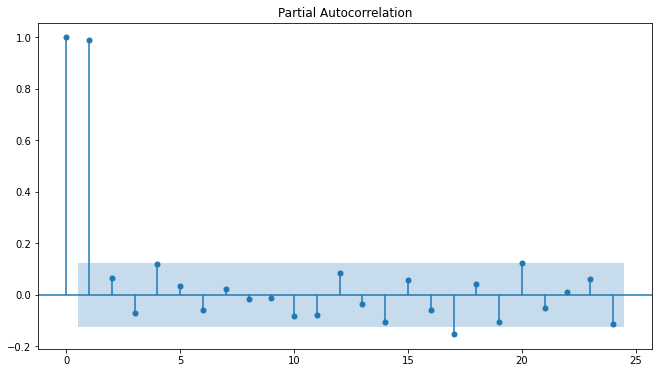

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF, PACF 그려보기 -> p,q 구하기
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프를 볼 때 p가 2 이상인 구간에서는 PCAF 그래프는 0에 가까워 지고 있기 때문에 p=1이 매우 적합하다.    
ACF는 점차적으로 감소하고 있어, q에 대한 적합한 값이 없어보이므로 q=0으로 둔다.

Results of Dickey-Fuller Test:
Test Statistic                -1.633250e+01
p-value                        3.051169e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


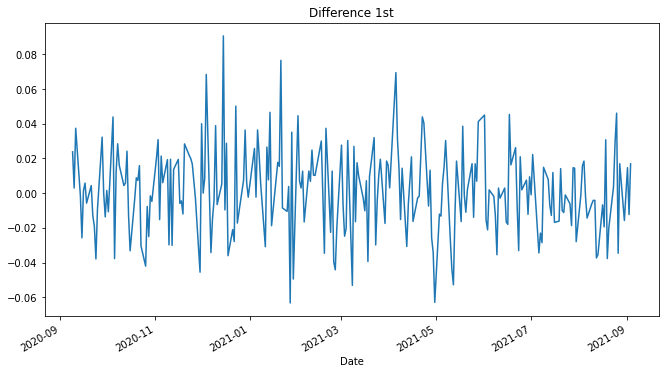

In [71]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -6.837717e+00
p-value                        1.824406e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


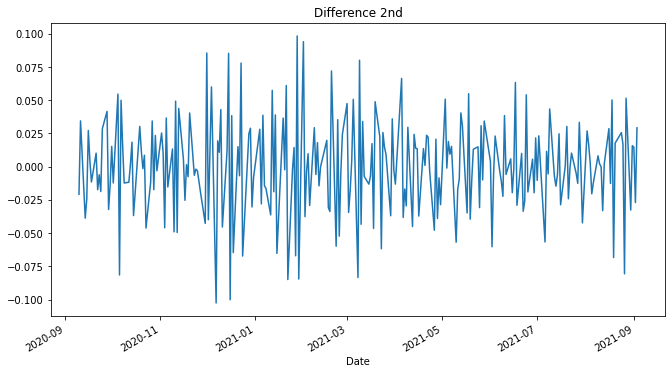

In [72]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

p-value를 확인하였을 때 1차 미분 하였을 때가 더 낮은 값이 출력되었으므로, 1차 미분하였을 때가 더 안정화된 상태란걸 확인할 수 있기 때문에 d=1로 정해준다.

최종 선택한 모수는 p=1 q=0 d=1 이다.

## STEP 6 : ARIMA 모델 훈련과 테스트

In [80]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0)) # order=(p,d,q)
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 508.506
Method:                       css-mle   S.D. of innovations              0.025
Date:                Mon, 06 Sep 2021   AIC                          -1011.012
Time:                        23:15:53   BIC                          -1000.777
Sample:                             1   HQIC                         -1006.881
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.002      1.073      0.283      -0.001       0.005
ar.L1.D.Close    -0.0389      0.067     -0.583      0.560      -0.170       0.092
                                    Root

C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jslee\.conda\envs\jupyter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no 

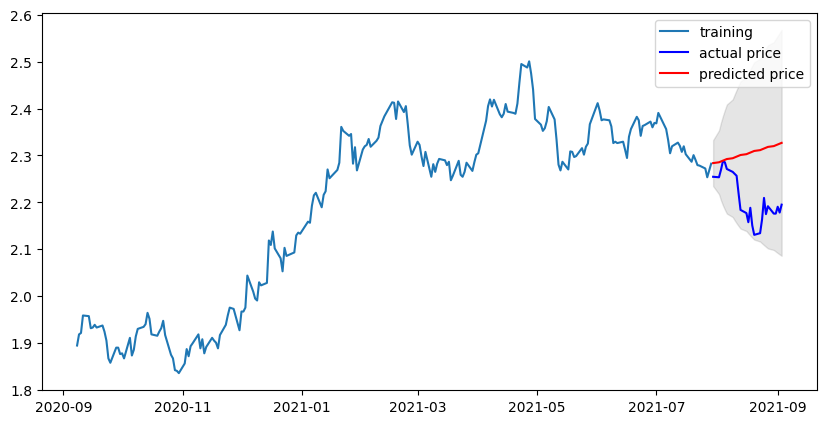

In [81]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1.1398124162004888
MAE:  0.9223937496041509
RMSE:  1.0676199774266537
MAPE: 10.43%


# 루브릭
---

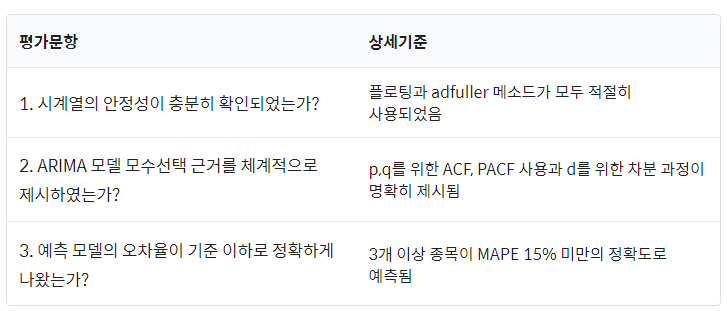

# 결과 및 회고

|데이터|ARIMA 모수|Result|
|------|---|---|
|`NAVER 주식 시세`|p=1, q=0, d=1|MSE:   273121371.38867277<br>MAE:   13484.391961321118<br>RMSE:   16526.384099030034<br>__MAPE:   3.14%__|
|`APPLE 주식 시세`|p=1, q=0, d=1|MSE:   4.034801430412081<br>MAE:   1.5856051803061735<br>RMSE:   2.0086815154254993<br>__MAPE:   1.05%__|
|`LGDISPLAY 주식 시세`|p=1, q=0, d=1|MSE:   1.1398124162004888<br>MAE:   0.9223937496041509<br>RMSE:   1.0676199774266537<br>__MAPE:   10.43%__|


프로젝트 마지막에는 항상 프로젝트에 대한 회고를 기록합니다. 

회고에는 다음과 같은 것들이 포함됩니다.

- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

워낙 통계학에 대한 기본 개념이 없어서 해당 노드를 읽는데 힘이 들었다. 그래서 여러 자료를 찾아 최대한 이해하려고 노력하였다.    
그래서 해당 노드에 대한 개념들은 대부분 이해하였는데 ARIMA 모델은 이해가 조금 부족한 것 같다. 영상 자료등을 더 찾아봐 이해하려고 노력해야겠다(앞으로를 위해...)    
루브릭을 맞추기 위한 노력들도 개념을 이해하는데 많은 시간을 쏟은것 같다.(개념을 이해해야 p,d,q 등에 대한 값을 설정할 수 있으므로...) 이번 노드는 기본 제시한 방법만 잘 따라하면 MAPE 는 잘 나오기 때문에 개념이해해 힘썻다.    

항상 노드를 진행하다 보면 수학적, 통계적 개념이 나오면 겁난다ㅠㅠㅠ 수학적, 통계적 개념을 학습을 꾸준히 진행하자...!